# Simple Linear Regression - Salary Data #
Use the dataset ***SLR_Data.csv*** for this exercise.


## Import relevant packages and read the data ##

In [7]:
# Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("../SLR_salary.csv")


## Explore the data ##


In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [14]:
df.shape


(30, 2)

In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Plot a Scatter graph ##

Text(0.5, 1.0, 'Salary by years of experience')

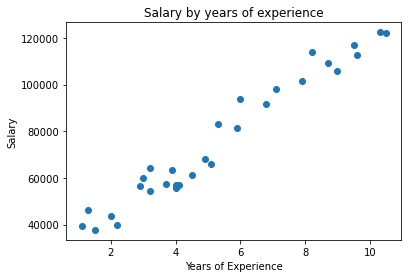

In [20]:
# Extract the predictor variables (Advertising) and the response variable (Sales)
experience = df["YearsExperience"]
salary = df["Salary"]

# Create a scatter plot of the data points
plt.scatter(experience, salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary by years of experience')

## Split the DataFrame into train and test data ##

In [21]:
train, test = train_test_split(
    df,
    random_state = 13 # this ensures that we get the same answer each time
)

In [26]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)

Train shape: (22, 2)
Test shape: (8, 2)



 ## Train the model



In [27]:
# Identify dependent and independent variables

dependent_var = train['Salary']
independent_var = train['YearsExperience']
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()


## Interpret the model results


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     398.1
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.13e-14
Time:                        23:41:08   Log-Likelihood:                -221.31
No. Observations:                  22   AIC:                             446.6
Df Residuals:                      20   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.306e+04   2795.184      8.249      0.000    1.72e+04    2.89e+04
YearsExperience  9955.3660    498.963     19.952      0.000    8914.548     1.1e+04
==============================================================================
Omnibus:                        2.515   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.394
Skew:                           0.303   Prob(JB):                        0.498
Kurtosis:                       1.926   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation ###
- **Line of best fit:** y = 9953.37x + 23,060
- **p-value**: < 0.05. This shows that our data is statistically significant and that the values for our variable cannot be explained by mere coincidence
- **R-squared**: 95.2\%. The model fits the data,

## Predict data in the test set ##



In [29]:
# Predict the model results on the test data

predicted = model.predict(
    sm.add_constant(test['YearsExperience'])
  
)

## Is the model also 'a good fit' for our test data? ##


In [30]:
# Measure the test R squared

metrics.r2_score(test['Salary'],predicted)

0.9527970214793431

Yes, the R-square value is high. It should be normally in the range of +/-10\% of the training R-square.

## Rebuild the model for the whole data set ##

In [31]:
dependent_var = df['Salary']
independent_var = df['YearsExperience']
independent_var = sm.add_constant(independent_var)

# Build the model 
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        23:53:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make a prediction ##

In [32]:
# Predict the salary with 10 years of experience
new_data = pd.DataFrame({'const': 1, 'YearsExperience': 10}, index=[0])
predicted_salary = model.predict(new_data)

print("Predicted salary for 10 years of experience:", predicted_salary[0])

Predicted salary for 10 years of experience: 120291.82341321948
